<font size = "10"><center>Computer Vision Project</center></font>
<font size = "4"><center>Amanpreet Singh</center></font>
<center>Spring 2019</center>

In [9]:
# from google.colab import drive
# drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [10]:
# import sys
# sys.path.append('/content/gdrive/MyDrive/DL_tutorials/SuperResolution-using-GANs-master/SuperResolution-using-GANs-master/Codes')

In [1]:
import csv
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision
import torchvision.utils as vutils
import numpy as np
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt
from vis_utils import *
from utils import *
from torchvision.datasets import CelebA

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print ("Using device {}".format(device))

Using device cuda:0


In [16]:
# from download_celeba import download_check_integrity

# base_folder = "celeba"
# root = "/content/gdrive/MyDrive/data"
# download_check_integrity(root, base_folder)
# celeba_datasets = torchvision.datasets.CelebA(root = root,download=True)
# /content/gdrive/MyDrive/data/celeba/img_align_celeba.zip
# ./gdrive/MyDrive/data/celeba/img_align_celeba.zip

Using downloaded and verified file: ./data/celeba/img_align_celeba.zip
Using downloaded and verified file: ./data/celeba/list_attr_celeba.txt
Using downloaded and verified file: ./data/celeba/identity_CelebA.txt
Using downloaded and verified file: ./data/celeba/list_bbox_celeba.txt
Using downloaded and verified file: ./data/celeba/list_landmarks_align_celeba.txt
Using downloaded and verified file: ./data/celeba/list_eval_partition.txt
Extracting downloaded images
Success


In [ ]:
# batch_size = 128

# image_size = 64

# # transformation to downsample image and convert to Tensor
# transform=torchvision.transforms.Compose([
#                               #  torchvision.transforms.Resize(image_size),
#                               #  torchvision.transforms.CenterCrop(image_size),
#                                torchvision.transforms.ToTensor(),
#                               #  torchvision.transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
#                            ])

# celeb_train_ds = CelebA("./gdrive/MyDrive/data", download=True, transform=transform)
# celeb_test_ds = CelebA("./gdrive/MyDrive/data", download=True, split='test', transform=transform)

# celeb_train_loader = torch.utils.data.DataLoader(celeb_train_ds, shuffle=True, batch_size=batch_size)
# celeb_test_loader = torch.utils.data.DataLoader(celeb_test_ds, shuffle=True, batch_size=batch_size)

Files already downloaded and verified
Files already downloaded and verified


# 新段落

In [5]:
path = "../dataset/list_eval_partition.txt"

In [7]:
data = []

f = open(path,'r')
data = f.readlines()

print(len(data))
print(data[162770][:10])
print(data[-1])

202599
162771.jpg
202599.jpg 2



In [8]:
train_list = [];
val_list =[];
test_list = [];

for x in data:
    if x[11] == '0':
        train_list.append(x[:10])
    elif x[11] == '1':
        val_list.append(x[:10])
    elif x[11] == '2':
        test_list.append(x[:10])
train_list = train_list[:2000]   
print(len(train_list))
# train_list = train_list[:2000]
val_list = val_list[:250]
print(len(val_list))
# val_list = val_list[:250]
test_list = test_list[:250]
print(len(test_list))
# test_list = test_list[:250]

2000
250
250


In [12]:
path = "../dataset/img_align_celeba/"
sv_p = "../dataset/Down_sampled/Train/"

In [13]:
count = 0
for x in train_list:
    im = Image.open(path+x)
    sz = im.size
    im = np.asarray(im)
    im = im[1:-1:4]
    im = im.take(indices=range(1,sz[0]-1,4), axis=1)
    im = Image.fromarray(im, 'RGB')
    im.save(sv_p+x)
    count = count +1
    print("Images Processed : ", count )

Images Processed :  1
Images Processed :  2
Images Processed :  3
Images Processed :  4
Images Processed :  5
Images Processed :  6
Images Processed :  7
Images Processed :  8
Images Processed :  9
Images Processed :  10
Images Processed :  11
Images Processed :  12
Images Processed :  13
Images Processed :  14
Images Processed :  15
Images Processed :  16
Images Processed :  17
Images Processed :  18
Images Processed :  19
Images Processed :  20
Images Processed :  21
Images Processed :  22
Images Processed :  23
Images Processed :  24
Images Processed :  25
Images Processed :  26
Images Processed :  27
Images Processed :  28
Images Processed :  29
Images Processed :  30
Images Processed :  31
Images Processed :  32
Images Processed :  33
Images Processed :  34
Images Processed :  35
Images Processed :  36
Images Processed :  37
Images Processed :  38
Images Processed :  39
Images Processed :  40
Images Processed :  41
Images Processed :  42
Images Processed :  43
Images Processed :  

In [16]:
sv_p = "../dataset/Down_sampled/Val/"

count = 0
for x in val_list:
    im = Image.open(path+x)
    sz = im.size
    im = np.asarray(im)
    im = im[1:-1:4]
    im = im.take(indices=range(1,sz[0]-1,4), axis=1)
    im = Image.fromarray(im, 'RGB')
    im.save(sv_p+x)
    count = count +1
    print("Images Processed : ", count )

Images Processed :  1
Images Processed :  2
Images Processed :  3
Images Processed :  4
Images Processed :  5
Images Processed :  6
Images Processed :  7
Images Processed :  8
Images Processed :  9
Images Processed :  10
Images Processed :  11
Images Processed :  12
Images Processed :  13
Images Processed :  14
Images Processed :  15
Images Processed :  16
Images Processed :  17
Images Processed :  18
Images Processed :  19
Images Processed :  20
Images Processed :  21
Images Processed :  22
Images Processed :  23
Images Processed :  24
Images Processed :  25
Images Processed :  26
Images Processed :  27
Images Processed :  28
Images Processed :  29
Images Processed :  30
Images Processed :  31
Images Processed :  32
Images Processed :  33
Images Processed :  34
Images Processed :  35
Images Processed :  36
Images Processed :  37
Images Processed :  38
Images Processed :  39
Images Processed :  40
Images Processed :  41
Images Processed :  42
Images Processed :  43
Images Processed :  

In [17]:
sv_p = "../dataset/Down_sampled/Test/"

count = 0
for x in test_list:
    im = Image.open(path+x)
    sz = im.size
    im = np.asarray(im)
    im = im[1:-1:4]
    im = im.take(indices=range(1,sz[0]-1,4), axis=1)
    im = Image.fromarray(im, 'RGB')
    im.save(sv_p+x)
    count = count +1
    print("Images Processed : ", count )

Images Processed :  1
Images Processed :  2
Images Processed :  3
Images Processed :  4
Images Processed :  5
Images Processed :  6
Images Processed :  7
Images Processed :  8
Images Processed :  9
Images Processed :  10
Images Processed :  11
Images Processed :  12
Images Processed :  13
Images Processed :  14
Images Processed :  15
Images Processed :  16
Images Processed :  17
Images Processed :  18
Images Processed :  19
Images Processed :  20
Images Processed :  21
Images Processed :  22
Images Processed :  23
Images Processed :  24
Images Processed :  25
Images Processed :  26
Images Processed :  27
Images Processed :  28
Images Processed :  29
Images Processed :  30
Images Processed :  31
Images Processed :  32
Images Processed :  33
Images Processed :  34
Images Processed :  35
Images Processed :  36
Images Processed :  37
Images Processed :  38
Images Processed :  39
Images Processed :  40
Images Processed :  41
Images Processed :  42
Images Processed :  43
Images Processed :  

In [18]:
np.savetxt("../dataset/train_filenames.csv", train_list, delimiter=",", fmt='%s')
np.savetxt("../dataset/val_filenames.csv", val_list, delimiter=",", fmt='%s')
np.savetxt("../dataset/test_filenames.csv", test_list, delimiter=",", fmt='%s')

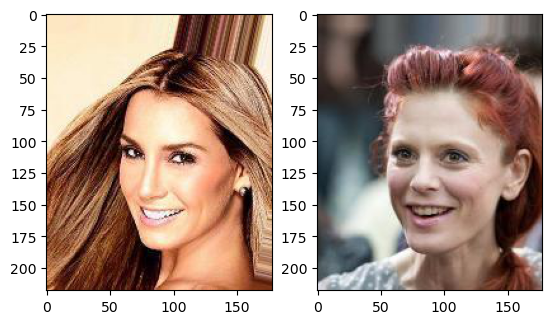

In [19]:
im = Image.open(path+train_list[0])
im1 = Image.open(path+train_list[1])

f, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(im)
ax2.imshow(im1)
plt.show()

In [20]:
path = "../dataset/img_align_celeba/"
sv_p = "../dataset/row_col_trim/"

In [21]:
im = Image.open(path+train_list[0])
sz = im.size
im = np.asarray(im)
im = im[1:-1]
im = im.take(indices=range(1,sz[0]-1), axis=1)
im = Image.fromarray(im, 'RGB')
print(im.size)

(176, 216)


In [22]:
count = 0
for x in train_list:
    im = Image.open(path+x)
    sz = im.size
    im = np.asarray(im)
    im = im[1:-1]
    im = im.take(indices=range(1,sz[0]-1), axis=1)
    im = Image.fromarray(im, 'RGB')
    im.save(sv_p+x)
    count = count +1
    print("Images Processed : ", count )

Images Processed :  1
Images Processed :  2
Images Processed :  3
Images Processed :  4
Images Processed :  5
Images Processed :  6
Images Processed :  7
Images Processed :  8
Images Processed :  9
Images Processed :  10
Images Processed :  11
Images Processed :  12
Images Processed :  13
Images Processed :  14
Images Processed :  15
Images Processed :  16
Images Processed :  17
Images Processed :  18
Images Processed :  19
Images Processed :  20
Images Processed :  21
Images Processed :  22
Images Processed :  23
Images Processed :  24
Images Processed :  25
Images Processed :  26
Images Processed :  27
Images Processed :  28
Images Processed :  29
Images Processed :  30
Images Processed :  31
Images Processed :  32
Images Processed :  33
Images Processed :  34
Images Processed :  35
Images Processed :  36
Images Processed :  37
Images Processed :  38
Images Processed :  39
Images Processed :  40
Images Processed :  41
Images Processed :  42
Images Processed :  43
Images Processed :  

In [23]:
count = 0
for x in val_list:
    im = Image.open(path+x)
    sz = im.size
    im = np.asarray(im)
    im = im[1:-1]
    im = im.take(indices=range(1,sz[0]-1), axis=1)
    im = Image.fromarray(im, 'RGB')
    im.save(sv_p+x)
    count = count +1
    print("Images Processed : ", count )

Images Processed :  1
Images Processed :  2
Images Processed :  3
Images Processed :  4
Images Processed :  5
Images Processed :  6
Images Processed :  7
Images Processed :  8
Images Processed :  9
Images Processed :  10
Images Processed :  11
Images Processed :  12
Images Processed :  13
Images Processed :  14
Images Processed :  15
Images Processed :  16
Images Processed :  17
Images Processed :  18
Images Processed :  19
Images Processed :  20
Images Processed :  21
Images Processed :  22
Images Processed :  23
Images Processed :  24
Images Processed :  25
Images Processed :  26
Images Processed :  27
Images Processed :  28
Images Processed :  29
Images Processed :  30
Images Processed :  31
Images Processed :  32
Images Processed :  33
Images Processed :  34
Images Processed :  35
Images Processed :  36
Images Processed :  37
Images Processed :  38
Images Processed :  39
Images Processed :  40
Images Processed :  41
Images Processed :  42
Images Processed :  43
Images Processed :  

In [24]:
count = 0
for x in test_list:
    im = Image.open(path+x)
    sz = im.size
    im = np.asarray(im)
    im = im[1:-1]
    im = im.take(indices=range(1,sz[0]-1), axis=1)
    im = Image.fromarray(im, 'RGB')
    im.save(sv_p+x)
    count = count +1
    print("Images Processed : ", count )

Images Processed :  1
Images Processed :  2
Images Processed :  3
Images Processed :  4
Images Processed :  5
Images Processed :  6
Images Processed :  7
Images Processed :  8
Images Processed :  9
Images Processed :  10
Images Processed :  11
Images Processed :  12
Images Processed :  13
Images Processed :  14
Images Processed :  15
Images Processed :  16
Images Processed :  17
Images Processed :  18
Images Processed :  19
Images Processed :  20
Images Processed :  21
Images Processed :  22
Images Processed :  23
Images Processed :  24
Images Processed :  25
Images Processed :  26
Images Processed :  27
Images Processed :  28
Images Processed :  29
Images Processed :  30
Images Processed :  31
Images Processed :  32
Images Processed :  33
Images Processed :  34
Images Processed :  35
Images Processed :  36
Images Processed :  37
Images Processed :  38
Images Processed :  39
Images Processed :  40
Images Processed :  41
Images Processed :  42
Images Processed :  43
Images Processed :  

In [ ]:
# drive.flush_and_unmount()